In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

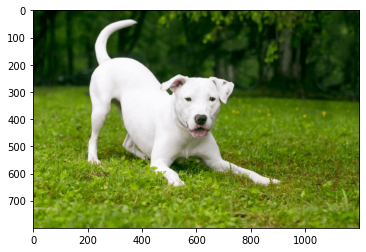

In [3]:
img = cv2.imread('../data/query_dog.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

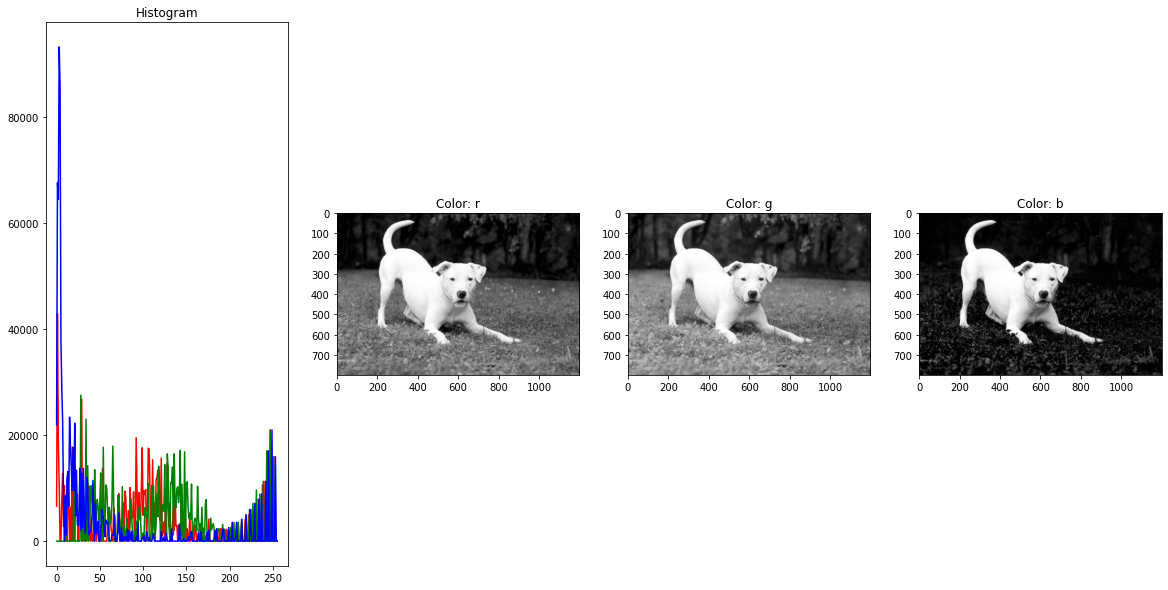

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
channels = cv2.split(img)
colors = ('r', 'g', 'b')

for (channel, color, ax) in zip(channels, colors, (ax2, ax3, ax4)):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    ax1.plot(hist, color=color)
    ax1.set_title('Histogram')
    ax.set_title('Color: {}'.format(color))
    ax.imshow(channel, cmap="gray")
    
    

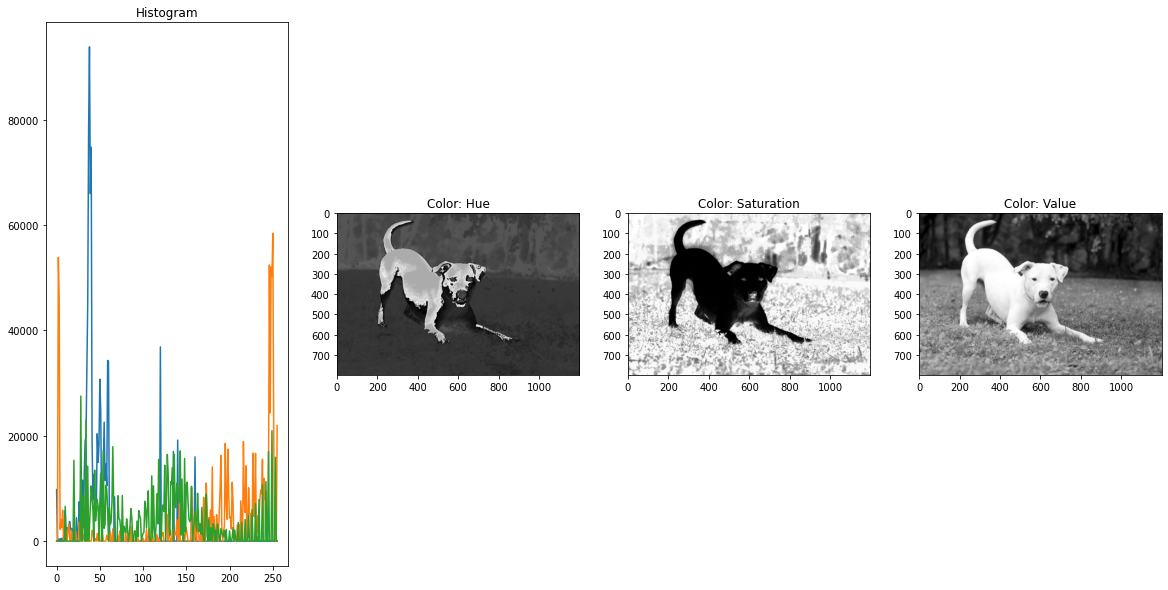

In [11]:
hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
hsv_channels = cv2.split(hsv_image)
channel_names = ('Hue', 'Saturation', 'Value')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
for (channel, color, ax) in zip(hsv_channels, channel_names, (ax2, ax3, ax4)):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    ax1.plot(hist)
    ax1.set_title('Histogram')
    ax.set_title('Color: {}'.format(color))
    ax.imshow(channel, cmap="gray")


In [12]:
# uniformly quantize HSV into 16, 8 and 8 bins
def quantize_hsv(img, bins=(16, 8, 8)):
    features = []
    for i in range(3):
        features.extend(cv2.calcHist([img], [i], None, [bins[i]], [0, 256]).flatten())
    return np.array(features)

In [13]:

quantized_hsv_histogram = quantize_hsv(hsv_image)
histogram = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 2, 2], [0, 180, 0, 256, 0, 256])
len(quantized_hsv_histogram)

32

<BarContainer object of 32 artists>

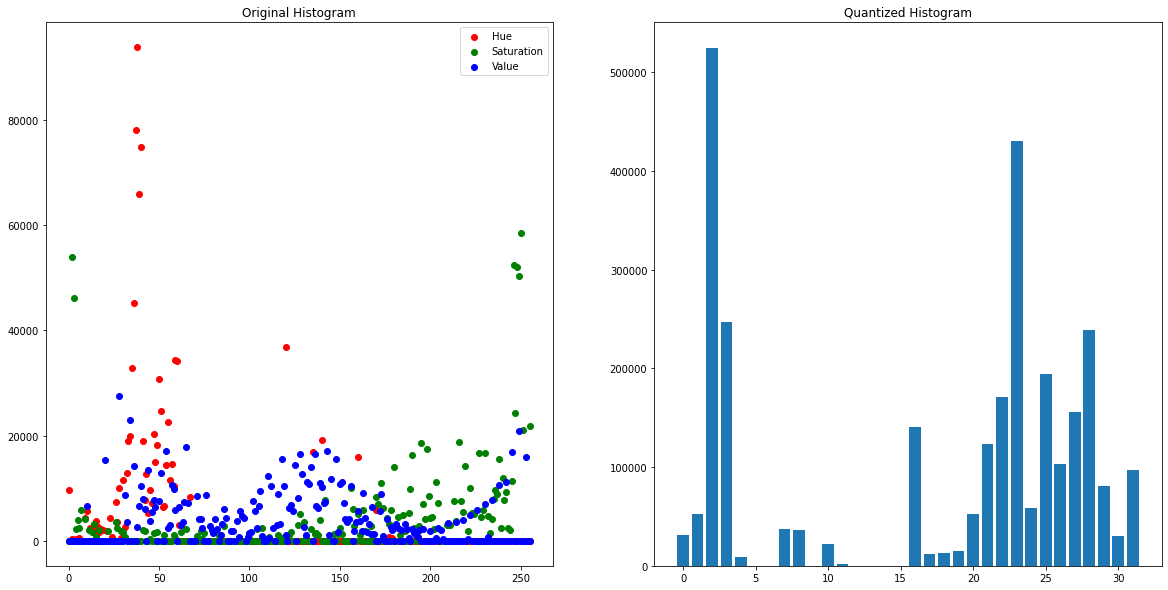

In [14]:
# plot both the original hsitogram and the quantized histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Histogram')
for i in range(3):
    hist = cv2.calcHist([hsv_image], [i], None, [256], [0, 256])
    ax1.scatter(range(256), hist, c=colors[i])
ax1.legend(['Hue', 'Saturation', 'Value'])
ax2.set_title('Quantized Histogram')
ax2.bar(np.arange(len(quantized_hsv_histogram)), quantized_hsv_histogram)

In [15]:
def partition_histogram(image, bins = (16, 8, 8)):
    """
    Partitions each channel of HSV image into bins
    note: hue is in range [0, 180] and saturation and value are in range [0, 255]
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(image)
    hist_h = cv2.calcHist([h], [0], None, [bins[0]], [0, 180])
    hist_s = cv2.calcHist([s], [0], None, [bins[1]], [0, 256])
    hist_v = cv2.calcHist([v], [0], None, [bins[2]], [0, 256])
    hist = np.concatenate((hist_h, hist_s, hist_v))
    return hist.flatten()

In [16]:
partitioned_histogram = partition_histogram(img)

<BarContainer object of 32 artists>

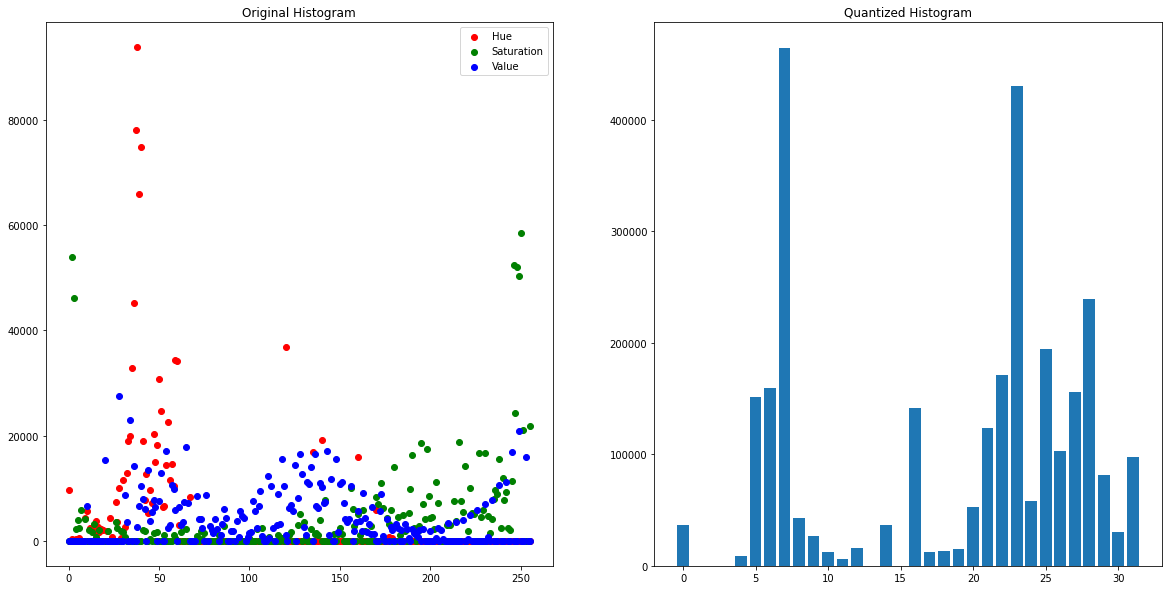

In [17]:

# plot the original histogram and the quantized histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Histogram')
for i in range(3):
    hist = cv2.calcHist([hsv_image], [i], None, [256], [0, 256])
    ax1.scatter(range(256), hist, c=colors[i])
ax1.legend(['Hue', 'Saturation', 'Value'])
ax2.set_title('Quantized Histogram')
ax2.bar(np.arange(len(partitioned_histogram)), partitioned_histogram)